## 探索电影数据集

使用 `NumPy`、`Pandas`、`matplotlib`、`seaborn` 库中的函数，来对电影数据集进行探索。

下载数据集：
[TMDb电影数据](https://s3.cn-north-1.amazonaws.com.cn/static-documents/nd101/explore+dataset/tmdb-movies.csv)



数据集各列名称的含义：
<table>
<thead><tr><th>列名称</th><th>id</th><th>imdb_id</th><th>popularity</th><th>budget</th><th>revenue</th><th>original_title</th><th>cast</th><th>homepage</th><th>director</th><th>tagline</th><th>keywords</th><th>overview</th><th>runtime</th><th>genres</th><th>production_companies</th><th>release_date</th><th>vote_count</th><th>vote_average</th><th>release_year</th><th>budget_adj</th><th>revenue_adj</th></tr></thead><tbody>
 <tr><td>含义</td><td>编号</td><td>IMDB 编号</td><td>知名度</td><td>预算</td><td>票房</td><td>名称</td><td>主演</td><td>网站</td><td>导演</td><td>宣传词</td><td>关键词</td><td>简介</td><td>时常</td><td>类别</td><td>发行公司</td><td>发行日期</td><td>投票总数</td><td>投票均值</td><td>发行年份</td><td>预算（调整后）</td><td>票房（调整后）</td></tr>
</tbody></table>




---

---

## 第一节 数据的导入与处理

使用 Pandas 读取数据，并进行预处理。


**setp 1.1：** 导入库以及数据

1. 载入需要的库 `NumPy`、`Pandas`、`matplotlib`、`seaborn`。
2. 利用 `Pandas` 库，读取 `tmdb-movies.csv` 中的数据，保存为 `movie_data`。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
movie_data = pd.read_csv('tmdb-movies.csv')

In [5]:
pd.to_datetime(movie_data.release_date)

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
5       2015-12-25
6       2015-06-23
7       2015-09-30
8       2015-06-17
9       2015-06-09
10      2015-10-26
11      2015-02-04
12      2015-01-21
13      2015-07-16
14      2015-04-22
15      2015-12-25
16      2015-01-01
17      2015-07-14
18      2015-03-12
19      2015-11-18
20      2015-05-19
21      2015-06-15
22      2015-05-27
23      2015-02-11
24      2015-12-11
25      2015-07-23
26      2015-06-25
27      2015-01-24
28      2015-11-06
29      2015-09-09
           ...    
10836   2066-01-01
10837   2066-06-21
10838   2066-11-01
10839   2066-10-27
10840   2066-12-22
10841   2066-10-23
10842   2066-01-01
10843   2066-06-09
10844   2066-01-16
10845   2066-03-01
10846   2066-01-09
10847   2066-06-20
10848   2066-08-24
10849   2066-12-16
10850   2066-02-23
10851   2066-06-22
10852   2066-05-31
10853   2066-03-29
10854   2066-02-17
10855   2066-01-20
10856   2066-02-16
10857   2066

---

**setp 1.2: ** 查看数据

在读取之后，通过一些简单的方法，了解数据表是什么样子。

1. 获取数据表的行列，并打印。
2. 使用 `.head()`、`.tail()`、`.sample()` 方法，观察、了解数据表的情况。
3. 使用 `.dtypes` 属性，来查看各列数据的数据类型。
4. 使用 `isnull()` 配合 `.any()` 等方法，来查看各列是否存在空值。
5. 使用 `.describe()` 方法，看看数据表中数值型的数据是怎么分布的。


In [3]:
# 观察数据
movie_data.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
# 查看各列数据类型
movie_data.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
# 查看各列是否存在空值，True表示有空值
movie_data.isnull().any(axis=0)

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [6]:
# 含有空值的列数
movie_data.isnull().any(axis=0).sum()

9

In [7]:
# 含有空值的行数
movie_data.isnull().any(axis=1).sum()

8874

In [8]:
# 另一种快速查看 数据类型 和 是否存在空值 的方法：.info()
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [9]:
# 查看数值型数据的分布
movie_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [10]:
# 查看重复数据数量
movie_data.duplicated().sum()

1

---

**step 1.3: ** 清理数据

数据处理往往是最为费时费力的环节。但是幸运的是，tmdb 数据集比较干净，不需要做特别多的数据清洗。这一步的核心的工作主要是对数据表中的空值进行处理。使用 `.fillna()` 来填补空值，也可以使用 `.dropna()` 来丢弃数据表中包含空值的某些行或者列。

最后将得到的干净数据保存。

In [11]:
# 清理之前先复制一份数据
movie_data_clean = movie_data.copy()

#### 问题1：`movie_data` 中存在重复数据

解决：使用 `.drop_duplicates()` 删除重复数据。

In [12]:
movie_data_clean.drop_duplicates(inplace=True)

In [13]:
movie_data_clean.duplicated().sum()

0

In [14]:
movie_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

#### 问题2: `movie_data` 中存在不需要分析的特征

解决：将`cast`, `homepage`, `tagline`, `keywords`, `overview`, `production_companies`, `budget_adj`, `revenue_adj`等多余的特征删除。

In [15]:
movie_data_clean.drop(labels=['imdb_id', 'cast','homepage','tagline','keywords','overview','production_companies','budget_adj','revenue_adj'], 
              axis=1, inplace=True)

In [16]:
# 将清理后的数据保存到 tmdb-movies-clean.csv
movie_data_clean.to_csv('tmdb-movies-clean.csv', index=False)

---

---

## 第二节 根据指定要求读取数据


相比 Excel 等数据分析软件，Pandas 的一大特长在于，能够轻松地基于复杂的逻辑选择合适的数据。根据指定的要求，从数据表当中获取适当的数据，是使用 Pandas 中非常重要的技能。



---

**step 2.1: ** 简单读取

1. 读取数据表中名为 `id`、`popularity`、`budget`、`runtime`、`vote_average` 列的数据。
2. 读取数据表中前1～20行以及48、49行的数据。
3. 读取数据表中第50～60行的 `popularity` 那一列的数据。

每一个语句可以只能用一行代码实现。

In [17]:
# 读取清理后的数据
df = pd.read_csv('tmdb-movies-clean.csv')

In [18]:
# 读取 id、popularity、budget、runtime、vote_average 列
df[['id', 'popularity', 'budget', 'runtime', 'vote_average']]

,id,popularity,budget,runtime,vote_average
0,135397,32.985763,150000000,124,6.5
1,76341,28.419936,150000000,120,7.1
2,262500,13.112507,110000000,119,6.3
3,140607,11.173104,200000000,136,7.5
4,168259,9.335014,190000000,137,7.3
5,281957,9.110700,135000000,156,7.2
6,87101,8.654359,155000000,125,5.8
7,286217,7.667400,108000000,141,7.6
8,211672,7.404165,74000000,91,6.5
9,150540,6.326804,175000000,94,8.0


In [19]:
# 读取前1～20行以及48、49行的数据 (note: pandas 的行标签从0开始)
ind = list(range(20)) + list([47,48])
df.iloc[ind]

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015
5,281957,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015
6,87101,8.654359,155000000,440603537,Terminator Genisys,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015
7,286217,7.667400,108000000,595380321,The Martian,Ridley Scott,141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015
8,211672,7.404165,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015
9,150540,6.326804,175000000,853708609,Inside Out,Pete Docter,94,Comedy|Animation|Family,6/9/15,3935,8.0,2015


In [20]:
# 读取数据表中第50～60行的 popularity 那一列的数据 (note: pandas 的行标签从0开始)
df.loc[49:59, 'popularity']

49    2.885126
50    2.883233
51    2.814802
52    2.798017
53    2.793297
54    2.614499
55    2.584264
56    2.578919
57    2.575711
58    2.557859
59    2.550747
Name: popularity, dtype: float64

---

**step 2.2: **逻辑读取（Logical Indexing）

1. 读取数据表中 **`popularity` 大于5** 的所有数据。
2. 读取数据表中 **`popularity` 大于5** 的所有数据且**发行年份在1996年之后**的所有数据。

提示：Pandas 中的逻辑运算符如 `&`、`|`，分别代表`且`以及`或`。

使用 Logical Indexing实现。

In [21]:
# 读取 popularity 大于 5 的所有数据
df[df.popularity > 5]

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015
5,281957,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015
6,87101,8.654359,155000000,440603537,Terminator Genisys,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015
7,286217,7.667400,108000000,595380321,The Martian,Ridley Scott,141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015
8,211672,7.404165,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015
9,150540,6.326804,175000000,853708609,Inside Out,Pete Docter,94,Comedy|Animation|Family,6/9/15,3935,8.0,2015


In [22]:
# 读取 popularity 大于 5 且发行年份在1996年之后的所有数据
df[(df.popularity > 5) & (df.release_year > 1996)]

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015
5,281957,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015
6,87101,8.654359,155000000,440603537,Terminator Genisys,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015
7,286217,7.667400,108000000,595380321,The Martian,Ridley Scott,141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015
8,211672,7.404165,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015
9,150540,6.326804,175000000,853708609,Inside Out,Pete Docter,94,Comedy|Animation|Family,6/9/15,3935,8.0,2015


---

**setp 2.3: **分组读取

1. 对 `release_year` 进行分组，使用 [`.agg`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) 获得 `revenue` 的均值。
2. 对 `director` 进行分组，使用 [`.agg`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) 获得 `popularity` 的均值，从高到低排列。

使用 `Groupby` 命令实现。

In [23]:
# 1. 对 release_year 进行分组，使用 .agg 获得 revenue 的均值。
df.groupby('release_year')['revenue'].agg('mean')

release_year
1960    4.531406e+06
1961    1.089420e+07
1962    6.736870e+06
1963    5.511911e+06
1964    8.118614e+06
1965    1.308805e+07
1966    1.842102e+06
1967    1.844587e+07
1968    6.788025e+06
1969    7.869583e+06
1970    1.366395e+07
1971    7.362011e+06
1972    1.236825e+07
1973    2.225420e+07
1974    1.728808e+07
1975    2.176114e+07
1976    1.704267e+07
1977    3.825584e+07
1978    2.107353e+07
1979    2.955781e+07
1980    2.267516e+07
1981    2.164154e+07
1982    3.035116e+07
1983    2.884412e+07
1984    2.510023e+07
1985    2.638323e+07
1986    2.481635e+07
1987    2.769684e+07
1988    2.579001e+07
1989    3.770017e+07
1990    4.026641e+07
1991    3.538797e+07
1992    4.570040e+07
1993    3.907388e+07
1994    3.856212e+07
1995    5.232195e+07
1996    4.074261e+07
1997    5.549569e+07
1998    4.520559e+07
1999    5.069515e+07
2000    4.836432e+07
2001    5.541357e+07
2002    5.505120e+07
2003    5.387275e+07
2004    5.470301e+07
2005    4.537592e+07
2006    3.989152e+07


为了完成setp 2，还需要进行特定的数据处理：1）director 特征存在空值，需要过滤；2）有的director含有多个导演，需要进行提取。

In [24]:
# 查看director列的空值个数
df.director.isnull().sum()

44

In [25]:
# 查看director列数据
df.director.unique().tolist()

['Colin Trevorrow',
 'George Miller',
 'Robert Schwentke',
 'J.J. Abrams',
 'James Wan',
 'Alejandro GonzÃ¡lez IÃ±Ã¡rritu',
 'Alan Taylor',
 'Ridley Scott',
 'Kyle Balda|Pierre Coffin',
 'Pete Docter',
 'Sam Mendes',
 'Lana Wachowski|Lilly Wachowski',
 'Alex Garland',
 'Chris Columbus',
 'Joss Whedon',
 'Quentin Tarantino',
 'Olivier Megaton',
 'Peyton Reed',
 'Kenneth Branagh',
 'Francis Lawrence',
 'Brad Bird',
 'Antoine Fuqua',
 'Brad Peyton',
 'Sam Taylor-Johnson',
 'Adam McKay',
 'Christopher McQuarrie',
 'Seth MacFarlane',
 'Matthew Vaughn',
 'Tom McCarthy',
 'Wes Ball',
 'Bill Condon',
 'Neill Blomkamp',
 'Elizabeth Banks',
 'Steven Spielberg',
 'Rob Letterman',
 'Lenny Abrahamson',
 'Afonso Poyart',
 'Peter Sohn',
 'Jaume Collet-Serra',
 'John Crowley',
 'F. Gary Gray',
 'Breck Eisner',
 'Danny Boyle',
 'Guy Ritchie',
 'Lee Toland Krieger',
 'Ilya Naishuller',
 'Tim Johnson',
 'Jake Schreier',
 'Simon West',
 'Yorgos Lanthimos',
 'Todd Haynes',
 'Nancy Meyers',
 'Baltasar KormÃ

In [26]:
# 过滤空值，保存 df 到 df_dire
df_dire = df[df['director'].notnull()]
len(df), len(df_dire)

(10865, 10821)

In [27]:
# 查看所有包含分隔符'|'的director数据
df_dire[df_dire['director'].str.contains('|', regex=False)].director

8                                 Kyle Balda|Pierre Coffin
11                          Lana Wachowski|Lilly Wachowski
64                                Glenn Ficarra|John Requa
85                John Francis Daley|Jonathan M. Goldstein
100                                Chris Buck|Jennifer Lee
132                           Mark Burton|Richard Starzack
143                           Gerado Olivares|Otmar Penker
144                           Duke Johnson|Charlie Kaufman
184                        David O. Russell|Stephen Greene
214                                  Ryan Fleck|Anna Boden
239                             Toby Genkel|Sean McCormack
241                                Jill Bauer|Ronna Gradus
242                              Travis Cluff|Chris Lofing
247                                 Andrew Erwin|Jon Erwin
254                                Ross Duffer|Matt Duffer
255                                 Tom Gianas|Ross Shuman
265                          Jason Friedberg|Aaron Seltz

In [28]:
# 提取director列中的每一个导演名，成为一列，数据类型为 pd.Series
series_dire = df_dire["director"].str.split("|", expand=True).stack().reset_index(level=1,drop=True).rename('dire')

In [29]:
# 将 pd.Series 合并到主数据集
df_dire = df_dire.join(series_dire)

In [30]:
# 观察行标签为8数据，发现director列提取成功
df_dire.head(10)

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,dire
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,Colin Trevorrow
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,George Miller
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,Robert Schwentke
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,J.J. Abrams
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,James Wan
5,281957,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015,Alejandro GonzÃ¡lez IÃ±Ã¡rritu
6,87101,8.654359,155000000,440603537,Terminator Genisys,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015,Alan Taylor
7,286217,7.667400,108000000,595380321,The Martian,Ridley Scott,141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015,Ridley Scott
8,211672,7.404165,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,Kyle Balda
8,211672,7.404165,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,Pierre Coffin


In [31]:
df_dire['dire']

0                       Colin Trevorrow
1                         George Miller
2                      Robert Schwentke
3                           J.J. Abrams
4                             James Wan
5        Alejandro GonzÃ¡lez IÃ±Ã¡rritu
6                           Alan Taylor
7                          Ridley Scott
8                            Kyle Balda
8                         Pierre Coffin
9                           Pete Docter
10                           Sam Mendes
11                       Lana Wachowski
11                      Lilly Wachowski
12                         Alex Garland
13                       Chris Columbus
14                          Joss Whedon
15                    Quentin Tarantino
16                      Olivier Megaton
17                          Peyton Reed
18                      Kenneth Branagh
19                     Francis Lawrence
20                            Brad Bird
21                        Antoine Fuqua
22                          Brad Peyton


In [32]:
# 2. 对 director 进行分组，使用 .agg 获得 popularity 的均值，从高到低排列。
df_dire.groupby('dire')['popularity'].agg('mean').sort_values(ascending=False)

dire
Colin Trevorrow                   16.696886
David Leitch                      11.422751
Chad Stahelski                    11.422751
Juno John Lee                      8.411577
Alan Taylor                        6.883129
Peter Richardson                   6.668990
Christopher Nolan                  6.195521
Alex Garland                       6.118847
Patrick Tatopoulos                 5.806897
Wes Ball                           5.553082
Dan Gilroy                         5.522641
Chris Williams                     5.085896
Don Hall                           5.058319
Pierre Coffin                      5.041612
Bob Peterson                       4.908902
J.J. Abrams                        4.800957
Damien Chazelle                    4.780419
Anthony Russo                      4.667042
Joe Russo                          4.667042
Morten Tyldum                      4.485181
Francis Lawrence                   4.437604
Len Wiseman                        4.380968
James Gunn                 

---

---

## 第三节 绘图与可视化

对特定的数据进行图像的绘制以及可视化。例如，观察票房随着时间的变化、哪个导演最受欢迎等。

<table>
<thead><tr><th>可视化的目标</th><th>可以使用的图像</th></tr></thead><tbody>
 <tr><td>表示某一属性数据的分布</td><td>饼图、直方图、散点图</td></tr>
 <tr><td>表示某一属性数据随着某一个变量变化</td><td>条形图、折线图、热力图</td></tr>
 <tr><td>比较多个属性的数据之间的关系</td><td>散点图、小提琴图、堆积条形图、堆积折线图</td></tr>
</tbody></table>

下面对感兴趣的问题进行数据汇总和可视化。

**任务3.1：**对 `popularity` 最高的20名电影绘制其 `popularity` 值。

In [33]:
# 根据 popularity 进行电影排名，过滤前20名的数据，查看电影名称和 popularity 值
df.sort_values('popularity', ascending=False)[:20].set_index('original_title')['popularity']

original_title
Jurassic World                                       32.985763
Mad Max: Fury Road                                   28.419936
Interstellar                                         24.949134
Guardians of the Galaxy                              14.311205
Insurgent                                            13.112507
Captain America: The Winter Soldier                  12.971027
Star Wars                                            12.037933
John Wick                                            11.422751
Star Wars: The Force Awakens                         11.173104
The Hunger Games: Mockingjay - Part 1                10.739009
The Hobbit: The Battle of the Five Armies            10.174599
Avatar                                                9.432768
Inception                                             9.363643
Furious 7                                             9.335014
The Revenant                                          9.110700
Fight Club                              

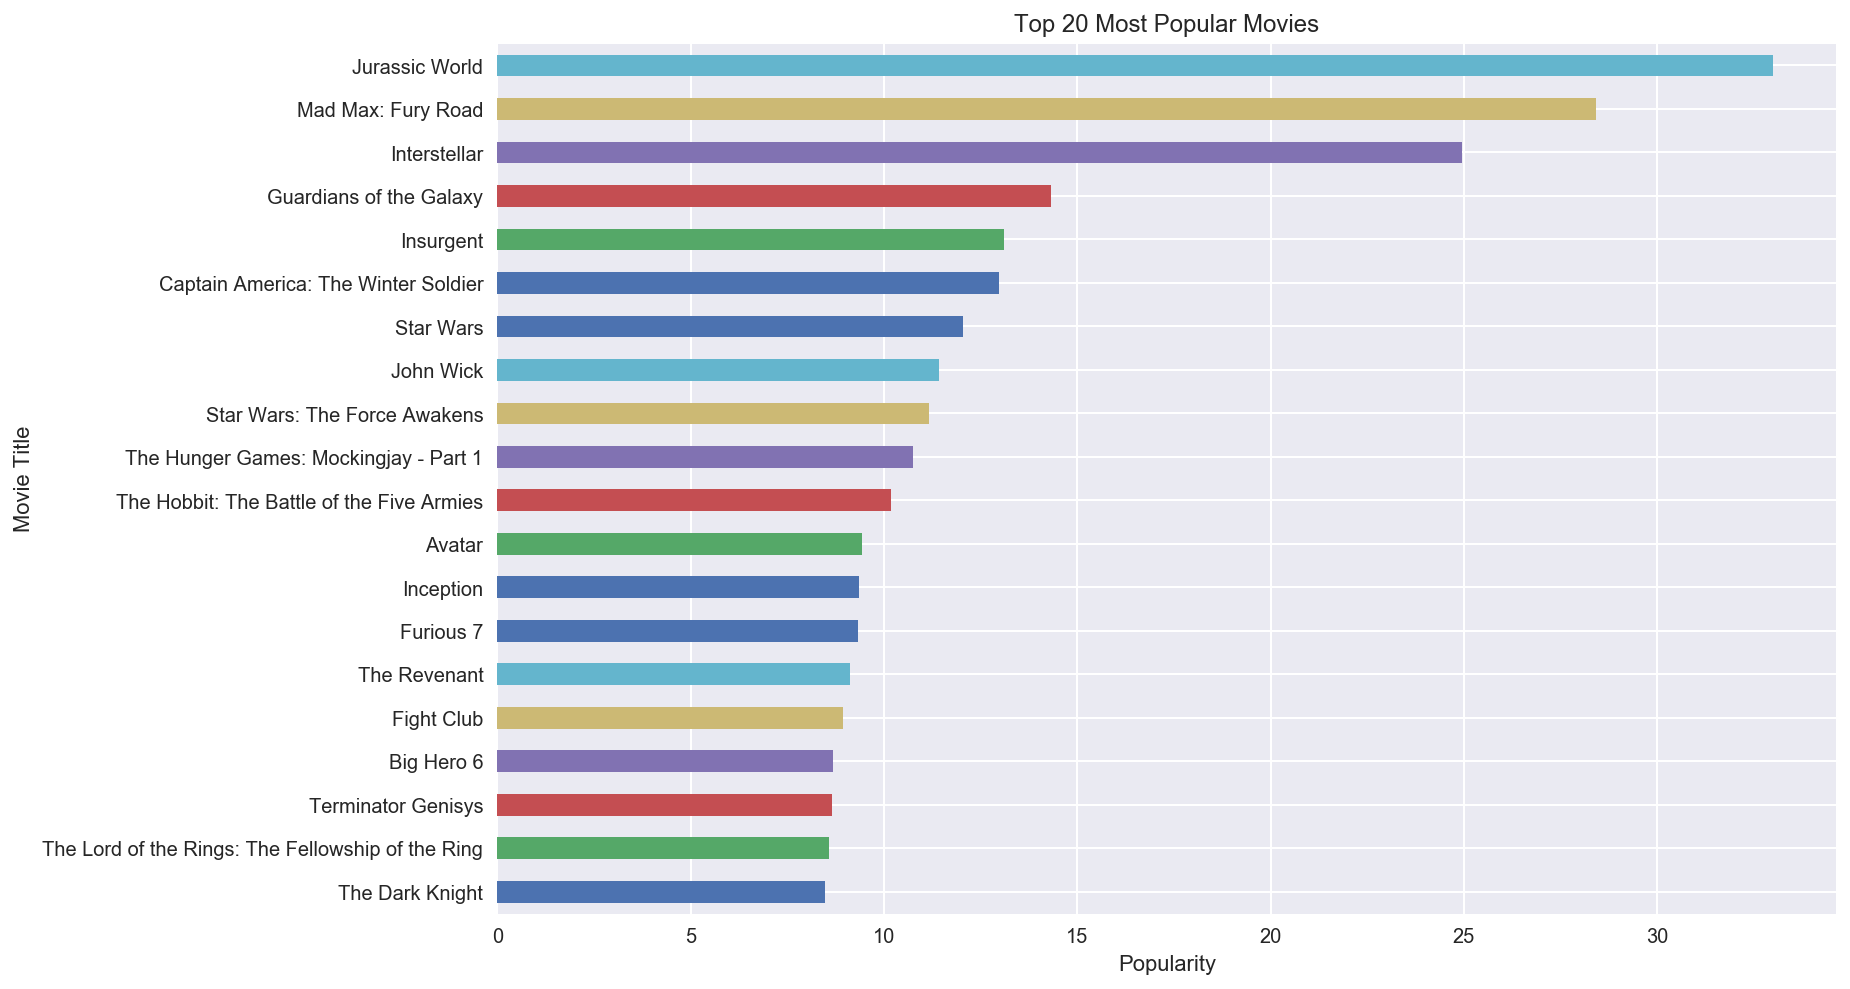

In [34]:
# 对 popularity 最高的20名电影绘制 横向柱状图
df.sort_values('popularity', ascending=True)[-20:].set_index('original_title')['popularity'].plot(
    kind='barh', figsize=(12,8))

plt.title('Top 20 Most Popular Movies')
plt.xlabel('Popularity')
plt.ylabel('Movie Title');

排名前20的最受欢迎的电影，欢迎度在 8.47～32.99 不等；排名前三的电影的欢迎度 远远超过其他电影，依次是《Jurassic World》《侏罗纪世界》(受欢迎度：32.99)，《Mad Max: Fury Road》《疯狂的麦克斯：狂暴之路》(受欢迎度：28.42)，《Interstellar》《星际穿越》(受欢迎度：24.95)。

---
**step 3.2：**分析电影净利润（票房-成本）随着年份变化的情况，并简单进行分析。

In [35]:
# 查看 票房或者成本为0的电影 
zero_movie = df[(df.budget == 0) | (df.revenue == 0)]
zero_movie

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
30,280996,3.927333,0,29355203,Mr. Holmes,Bill Condon,103,Mystery|Drama,6/19/15,425,6.4,2015
36,339527,3.358321,0,22354572,Solace,Afonso Poyart,101,Crime|Drama|Mystery,9/3/15,474,6.2,2015
48,265208,2.932340,30000000,0,Wild Card,Simon West,92,Thriller|Crime|Drama,1/14/15,481,5.3,2015
67,334074,2.331636,20000000,0,Survivor,James McTeigue,96,Crime|Thriller|Action,5/21/15,280,5.4,2015
72,284289,2.272044,0,45895,Beyond the Reach,Jean-Baptiste LÃ©onetti,95,Thriller,4/17/15,81,5.5,2015
74,347096,2.165433,0,0,Mythica: The Darkspore,Anne K. Black,108,Action|Adventure|Fantasy,6/24/15,27,5.1,2015
75,308369,2.141506,0,0,Me and Earl and the Dying Girl,Alfonso Gomez-Rejon,105,Comedy|Drama,6/12/15,569,7.7,2015
88,301875,1.959765,0,2000000,Equals,Drake Doremus,101,Drama|Romance|Science Fiction,9/4/15,135,5.6,2015
92,370687,1.876037,0,0,Mythica: The Necromancer,A. Todd Smith,0,Fantasy|Action|Adventure,12/19/15,11,5.4,2015
93,307663,1.872696,10000000,0,Vice,Brian A Miller,96,Thriller|Science Fiction|Action|Adventure,1/16/15,181,4.1,2015


In [36]:
len(df), len(zero_movie), len(zero_movie)/len(df)

(10865, 7011, 0.6452830188679245)

**分析思路：**总的数据集为10865条数据，而预算或者收入存在缺失的数据有7011条，占了65%；预算或者收入为0的电影，应该是数据缺失造成的；将这些数据过滤掉再进行分析。

In [37]:
# 数据预处理
df_profit = df.copy()
df_profit = df_profit[(df_profit.budget != 0) & (df_profit.revenue != 0)]

In [38]:
df_profit['profit'] = df['revenue'] - df['budget']

In [39]:
profit = df_profit.groupby('release_year')['profit'].agg(['mean','sum','count'])
profit

,mean,sum,count
release_year,,,
1960,2.163961e+07,108198052,5
1961,2.990832e+07,299083188,10
1962,2.383998e+07,166879846,7
1963,1.923531e+07,115411882,6
1964,4.209691e+07,294678387,7
1965,7.985637e+07,399281854,5
1966,1.049374e+07,52468689,5
1967,4.894882e+07,636334637,13
1968,1.869686e+07,168271762,9


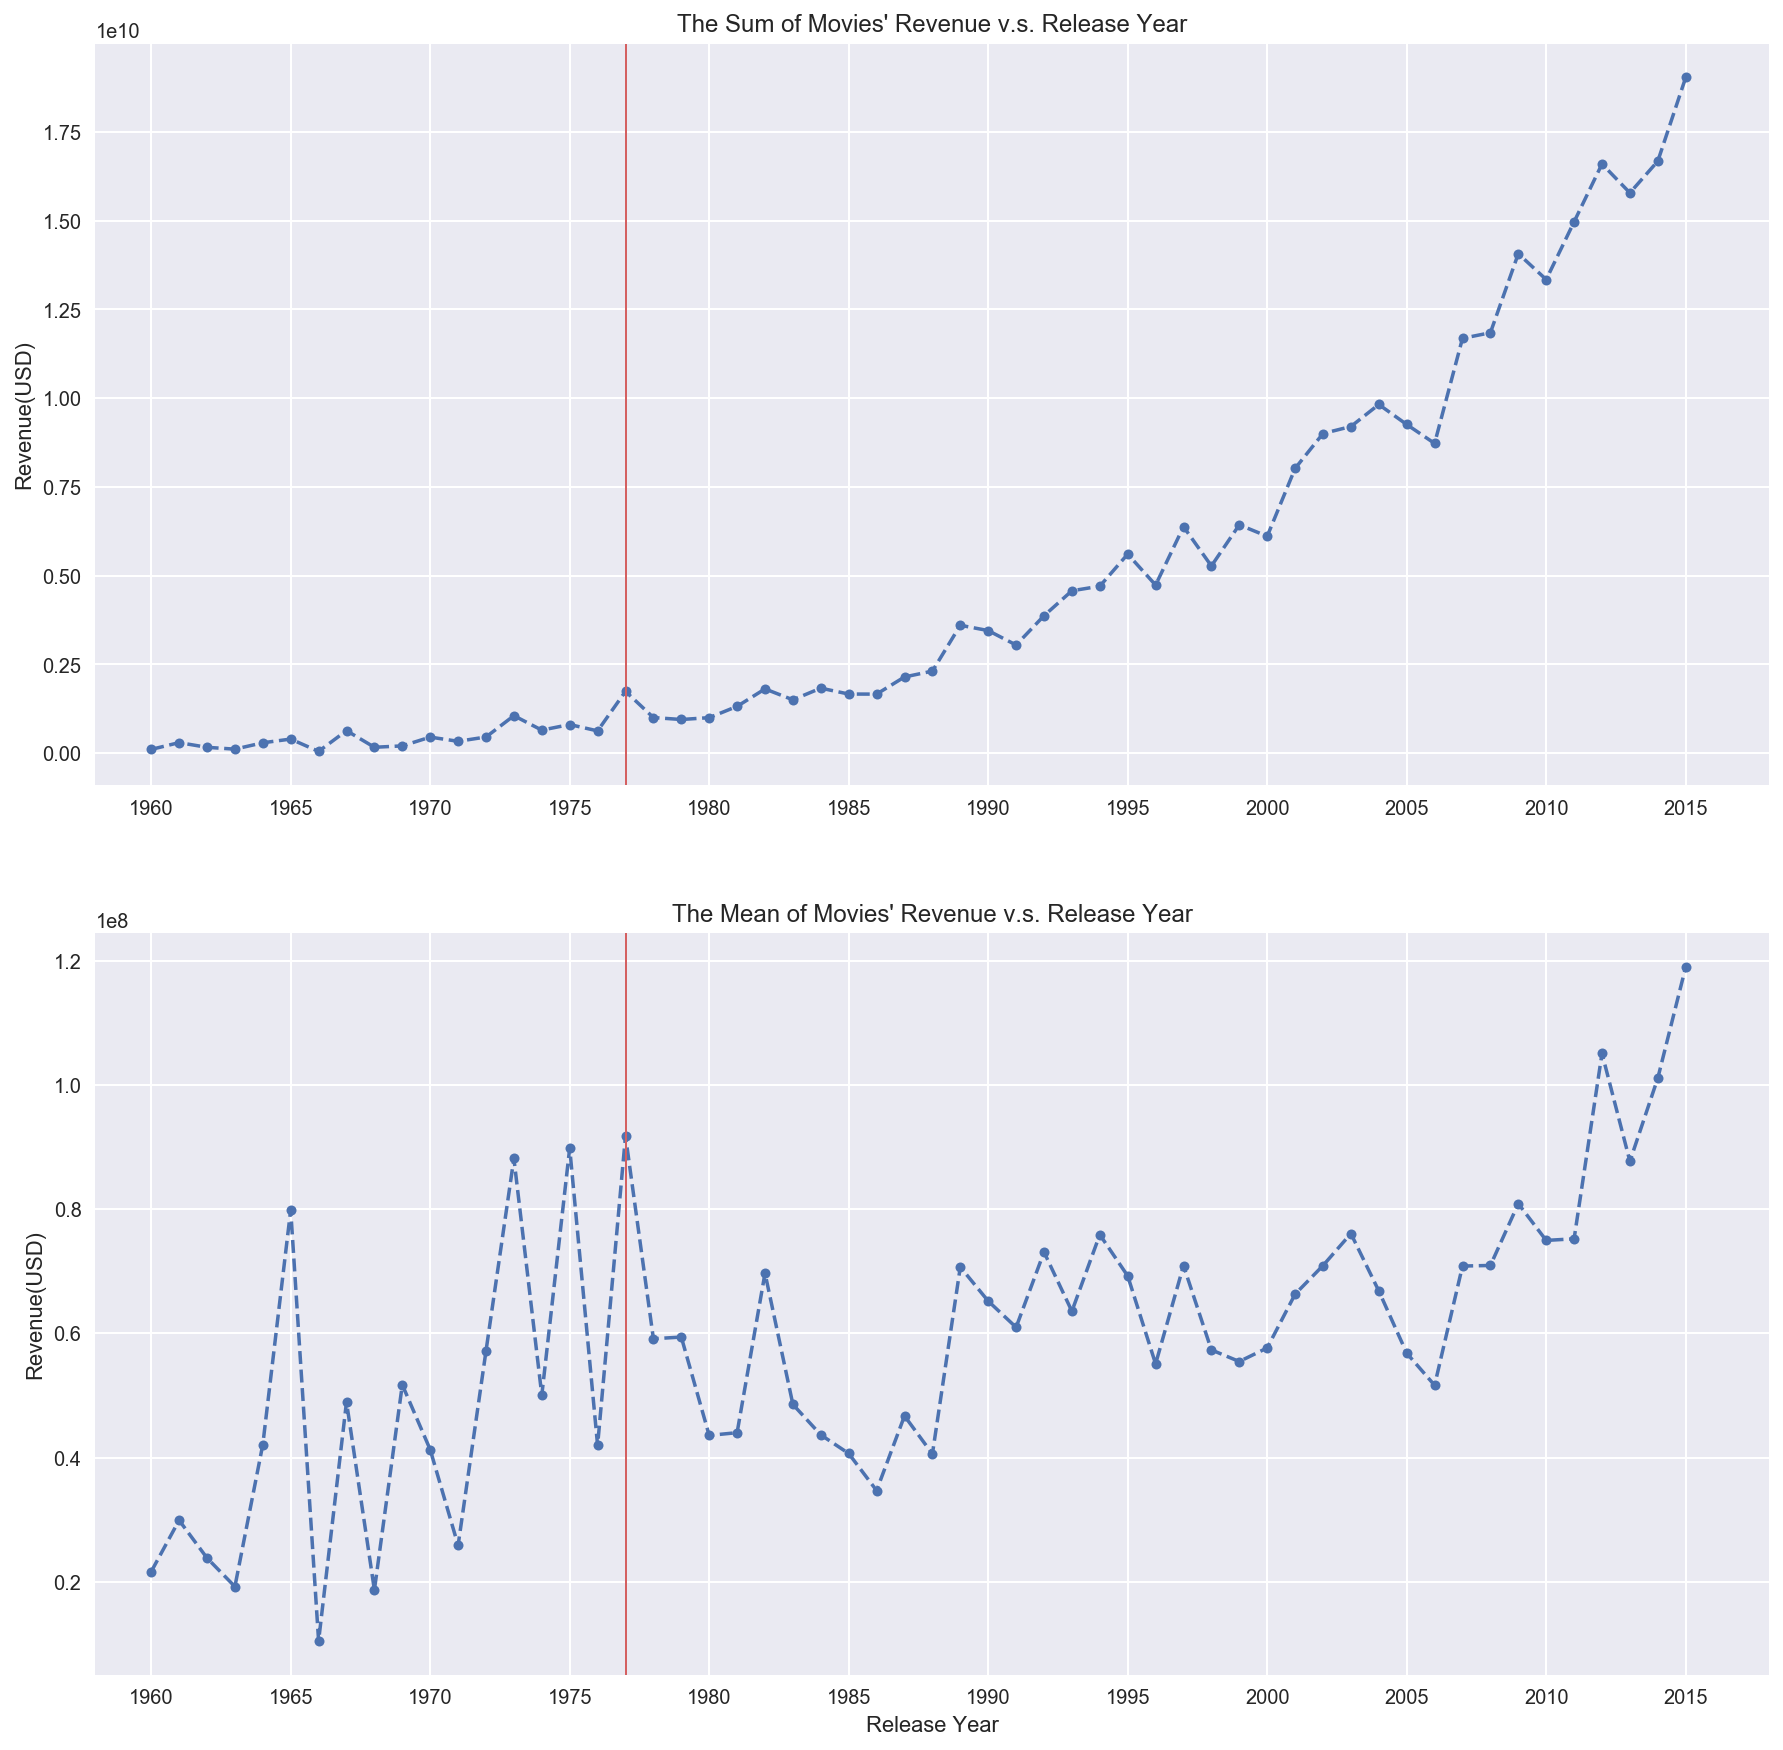

In [40]:
# 在同一个画布中绘制两张图
plt.figure(figsize=(15,15))
# 图一：每年上映电影的总收入
ax = plt.subplot(211)
# 设置x轴 范围
ax.set_xlim(1958,2018)
# 设置x轴 主刻度
ax.set_xticks(np.arange(1960,2018,5))
# 画图
ax.plot(profit['sum'], linestyle='--', marker='o', markersize=5)
ax.set_title('The Sum of Movies\' Revenue v.s. Release Year')
ax.set_ylabel('Revenue(USD)')
# 增加竖线
ax.axvline(x=1977, color='#d46061', linewidth=1);


# 图二：每年上映电影的平均收入
ax = plt.subplot(212)
# 设置x轴 范围
ax.set_xlim(1958,2018)
# 设置x轴 主刻度
ax.set_xticks(np.arange(1960,2018,5))
# 画图
ax.plot(profit['mean'], linestyle='--', marker='o', markersize=5);
ax.set_title('The Mean of Movies\' Revenue v.s. Release Year')
ax.set_xlabel('Release Year')
ax.set_ylabel('Revenue(USD)')
# 增加竖线
ax.axvline(x=1977, color='#d46061', linewidth=1);

**得出结论：**

1）从第一张图来看，电影票房总的净利润是逐年稳步攀升的，从1960年的 **1亿美元** 上升到2015年的 **190亿美元**，55年的时间里增长了接近200倍，相当可观！！

2）每年上映的电影数量也在增加，从1960年的**5部**电影增加到2015年的**160部**，所以，**电影数量**是对电影净利润做出贡献的一大因素。

3）第二张图是每年每部电影的平均净利润，平均净利润可以概括为在波动中逐渐增长，从1960年的**0.2亿美元**增长到2015年的**1.2亿美元**，平均每部电影的净利润增长了**5部**！1977年之前，每年电影数据量较小，都在15部以下，可能图像的剧烈波动跟该因素相关；之后的数据量都在15部及以上，图像显示也相对平稳，具有一定的说明性。


反思：将缺失数据全部删除有点不太妥当，应该将预算和票房都做平均值填充，fillna。

---

**step 3.3：**选择最多产的10位导演（电影数量最多的），绘制他们排行前3的三部电影的票房情况，并简要进行分析。

分析思路：要用到**step 2**中清理出来的数据集 `df_dire`。

In [41]:
# 排名前10的最多产的导演
top10_dire = df_dire.groupby('dire').id.agg('count').sort_values(ascending=False)[:10]
top10_dire

dire
Woody Allen          46
Clint Eastwood       34
Martin Scorsese      31
Steven Spielberg     30
Steven Soderbergh    23
Ridley Scott         23
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Tim Burton           20
Name: id, dtype: int64

In [42]:
# 筛选排名前10的最多产的导演的 数据集
top10_dire_movies = df_dire[df_dire['dire'].isin(top10_dire.index)]
top10_dire_movies

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,dire
7,286217,7.667400,108000000,595380321,The Martian,Ridley Scott,141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015,Ridley Scott
33,296098,3.648210,40000000,162610473,Bridge of Spies,Steven Spielberg,141,Thriller|Drama,10/15/15,1638,7.1,2015,Steven Spielberg
66,205775,2.345821,100000000,93820758,In the Heart of the Sea,Ron Howard,122,Thriller|Drama|Adventure|Action|History,11/20/15,805,6.4,2015,Ron Howard
155,282984,1.007054,11000000,27391084,Irrational Man,Woody Allen,95,Mystery|Drama,7/17/15,319,6.1,2015,Woody Allen
572,365717,0.082569,0,0,The Audition,Martin Scorsese,16,Comedy,10/27/15,10,6.1,2015,Martin Scorsese
657,190859,3.863074,58800000,542307423,American Sniper,Clint Eastwood,134,War|Action,12/11/14,3004,7.5,2014,Clint Eastwood
658,147441,3.813740,140000000,268031828,Exodus: Gods and Kings,Ridley Scott,153,Adventure|Drama|Action,12/3/14,1377,5.6,2014,Ridley Scott
733,87093,1.398713,10000000,28883511,Big Eyes,Tim Burton,105,Drama,12/24/14,710,6.8,2014,Tim Burton
790,229297,0.889247,0,32339326,Magic in the Moonlight,Woody Allen,97,Comedy|Drama|Romance,7/25/14,464,6.3,2014,Woody Allen
803,209451,0.797723,40000000,67347013,Jersey Boys,Clint Eastwood,134,Music|Drama,6/5/14,181,6.7,2014,Clint Eastwood


In [43]:
# 票房前3的电影的汇总结果
top3_revenue = top10_dire_movies.groupby('dire')['revenue'].nlargest(3)
top3_revenue

dire                    
Brian De Palma     8457      457696359
                   9043      103891409
                   9609       76270454
Clint Eastwood     657       542307423
                   2887      269958228
                   6989      216763646
Joel Schumacher    8081      336529144
                   5235      238207122
                   7083      154648887
Martin Scorsese    5427      392000694
                   1927      294804195
                   6562      289847354
Ridley Scott       7         595380321
                   8660      457640427
                   4367      403170142
Ron Howard         6557      758239851
                   1401      356613439
                   8075      355237933
Steven Soderbergh  2640      450717150
                   6979      362744280
                   7424      311312624
Steven Spielberg   10222     920100000
                   8888      792910554
                   2878      786636033
Tim Burton         1921     1025467110


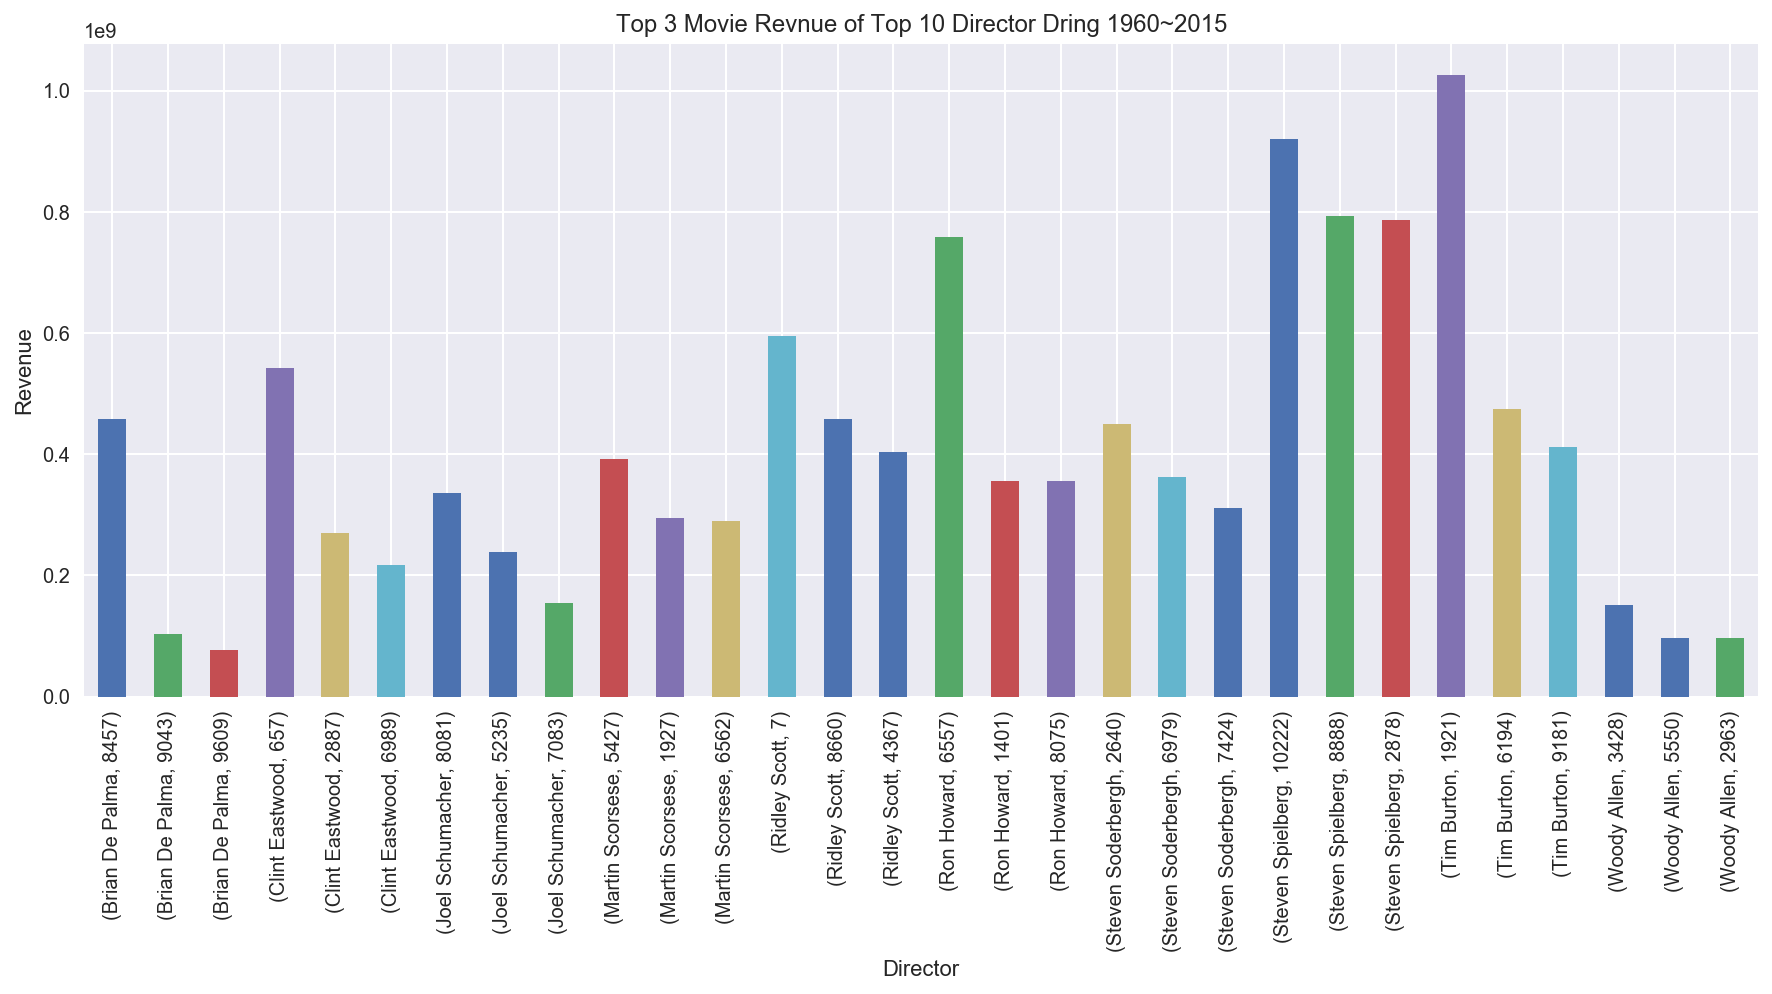

In [44]:
top3_revenue.plot(kind='bar', stacked=True, figsize=(15,6))
plt.title('Top 3 Movie Revnue of Top 10 Director Dring 1960~2015')
plt.xlabel('Director')
plt.ylabel('Revenue');

**得出结论：**

1）在1960到2015年间，最多产的电影导演是Woody Allen（伍迪·艾伦），高达46部；紧随其后的三名是Clint Eastwood（克林特·伊斯特伍德），Martin Scorsese（马丁·斯科塞斯），Steven Spielberg（斯蒂芬·斯皮尔伯格），电影数量分别为34部，31部，30部；其余电影导演的作品均在25部以下。

2）量产最高的导演 Woody Allen，反而是量产前10导演中排名前3电影整体票房最低的那一位，Woody Allen 排名前3的电影的平均票房只有1亿多美元；而量产排名第四的 Steven Spielberg，是获得电影票房最高的导演，排名前3的电影平均票房高达8亿多美元！这两位都是我个人比较喜欢的导演，一个胜在数量，一个胜在票房。

------ 对上面可视化效果进行改进 -----
---------------------
改进：将每个电影导演的排行前三的电影票房的柱状图堆叠起来，更容易比较。

Text(0.5,1,'Top 10 prolific directors with 3 movies of highest revenues')

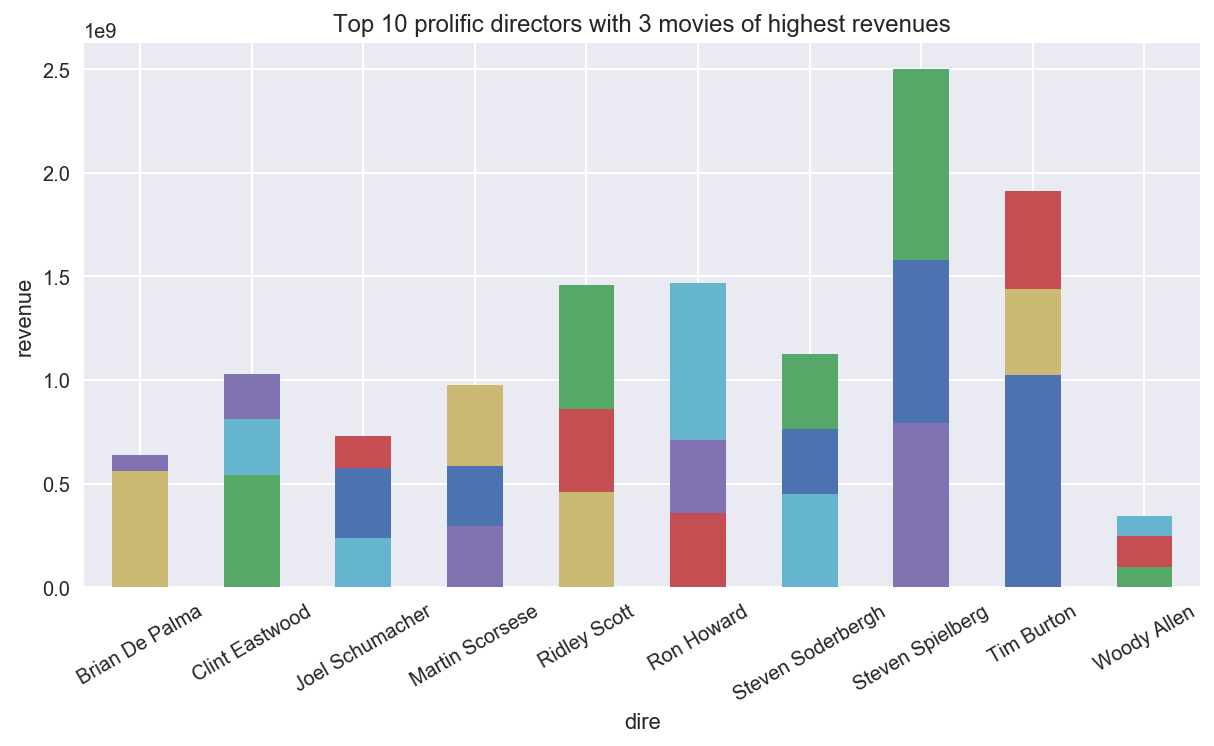

In [45]:
director_data = df_dire[['dire', 'original_title', 'revenue']]

# Get Most Prolific Directors 
top10_directors = director_data.groupby('dire').count()['original_title'].nlargest(10).index
top10_table = director_data[director_data['dire'].isin(top10_directors)]

# Rearrange Table for Plotting
top10_table = top10_table.sort_values(['dire','revenue'], ascending=[False,False]) \
  .set_index(['dire','original_title']) 

# Plot Highest Revenues
top10_table.groupby(level=0).head(3).unstack().plot(
    kind='bar',stacked=True, legend=False, rot=30, figsize=(10,5))
plt.ylabel('revenue')
plt.title("Top 10 prolific directors with 3 movies of highest revenues")

---

**step 3.4：**分析1968年~2015年六月电影的数量的变化。

**分析思路：**需要先将日期中的月份提取出来；可以将该功能封装到函数中，输入为原始数据集和月份，输出为一段时间内某个月份的电影数量的变化图示。

In [51]:
def movie_count_month_plot(df, m):
    '''
    输入：
    df-数据集
    month-月份，int类型 i.e.: 6
    
    输出：
    特定月份，电影数量随年份变化的折线图
    '''
    
    # 提取release_date中的月份信息到特征month
#     df['month1'] = df['release_date'].apply(lambda x: x.split('/')[0])
    # 筛选出特定月份的电影数据
#     data = df[df['month'] == month]

    # 另一种更好的方式是将 release_date 转为日期格式
    df['release_date'] = pd.to_datetime(df['release_date'])
    # 筛选出特定月份的电影数据
    data = df[df['release_date'].dt.month == m]
    
    result = data.groupby('release_year')['id'].count()
    print(result)
    result.plot(figsize=(15, 8), linestyle='-', marker='o', markersize=5)
    # 设置x轴刻度
    plt.xticks(np.arange(1960, 2018, 5))
    # 设置y轴刻度
#     plt.yticks(np.arange(0,50,5))
    plt.title('')
    plt.xlabel('Release Year')
    plt.ylabel('Count');

release_year
1960     4
1961     3
1962     8
1963    10
1964     6
1965     8
1966     7
1967     4
1968     2
1969     4
1970     3
1971     6
1972     2
1973     5
1974     3
1975     7
1976     8
1977     9
1978     6
1979     5
1980     7
1981     9
1982    13
1983     9
1984    15
1985    13
1986    14
1987    14
1988    13
1989    10
1990    10
1991     9
1992     7
1993    11
1994    11
1995     9
1996    12
1997     8
1998    13
1999    14
2000    12
2001    15
2002    20
2003    20
2004    22
2005    27
2006    27
2007    33
2008    27
2009    34
2010    40
2011    34
2012    44
2013    47
2014    48
2015    46
Name: id, dtype: int64


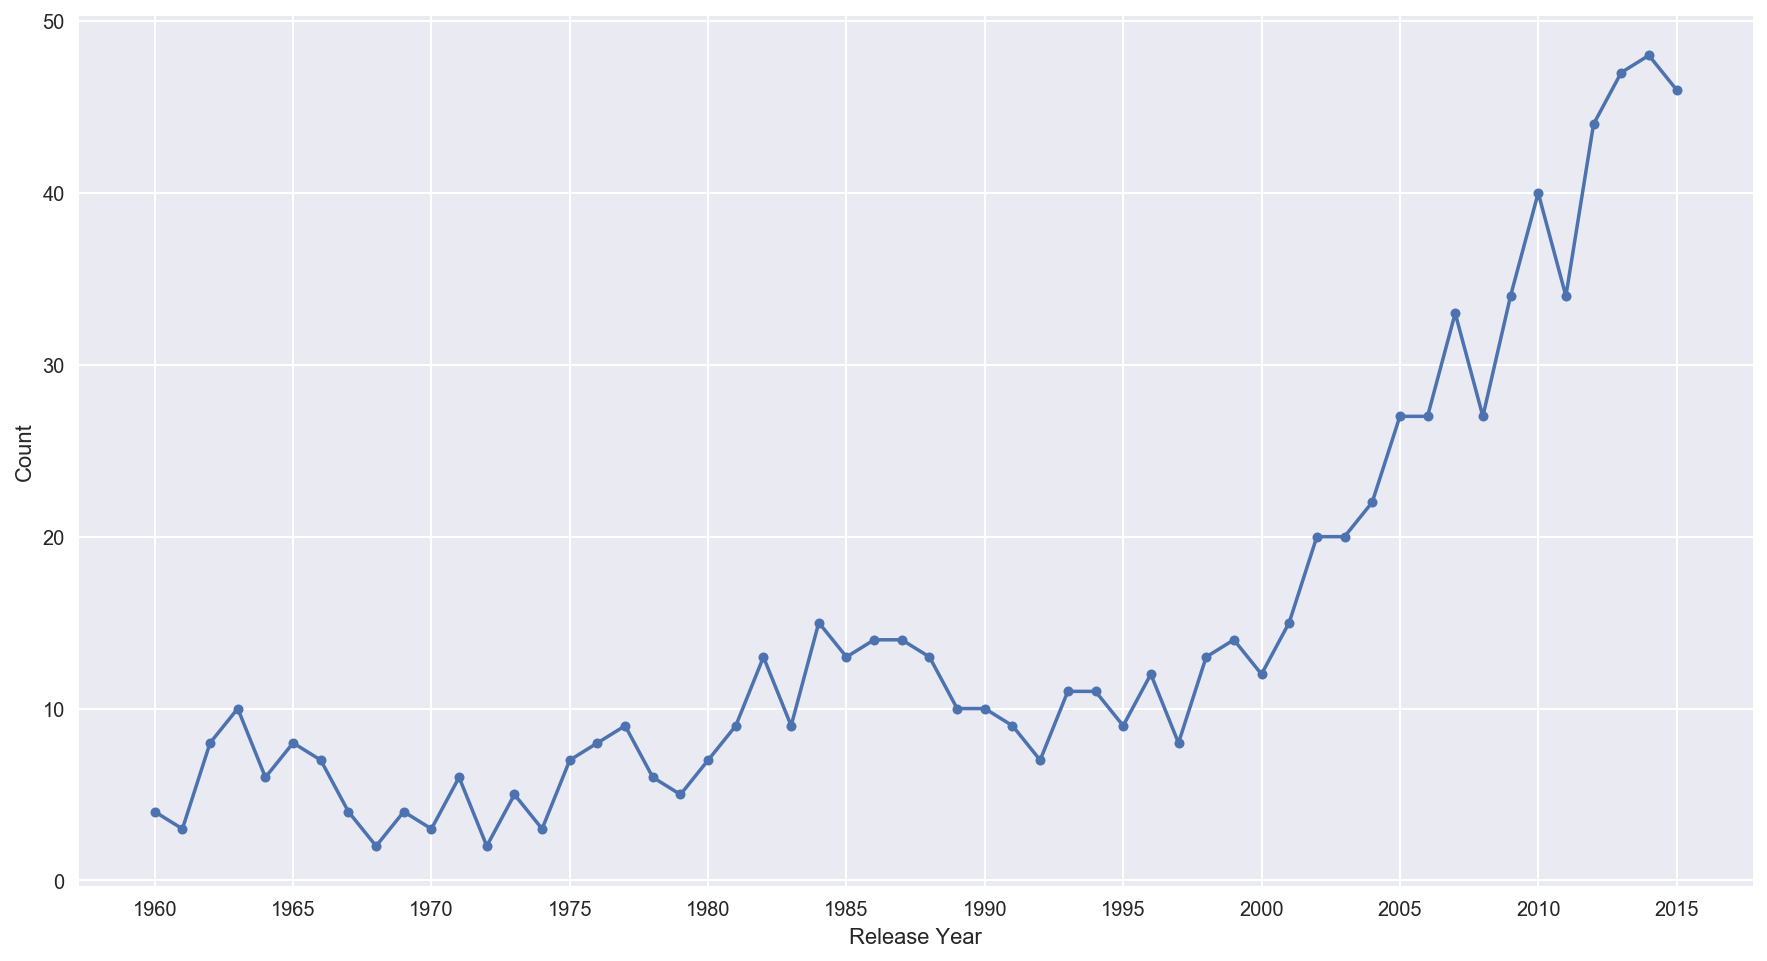

In [52]:
movie_count_month_plot(df, 6)

**得出结论：**

1960～2015年六月份上映的电影数量整体来看呈现在波动中增长的态势，从1960年的4部上升到2015年的46部。具体来说，2000年以前始终处于震荡中，增长趋势不明显；2000年以后，6月份上映的电影数量呈现明显的上涨趋势。

---

**step 3.5：**分析1968年~2015年六月电影 `Comedy` 和 `Drama` 两类电影的数量的变化。

**分析思路：**可以将该需求封装为函数：输入参数为数据集、电影风格、月份，输出为图示。

In [53]:
def movie_genre_month_plot(df, genres, m=6):
    '''
    输入：
    df-数据集
    genres-电影风格，列表类型 i.e.: ['Action'], ['Comedy','Drama']
    month-月份，int类型 i.e.: 6
    
    输出：
    特定月份，特定电影类型数量随年份变化的折线图
    '''
    
    # 提取release_date中的月份信息到特征month
    data = df.copy()
    data['release_date'] = pd.to_datetime(data['release_date'])
    # 筛选出特定月份的电影数据
    data = data[data['release_date'].dt.month == m]
    
    # 提取每个电影类型单独成一列
    for genre in genres:
        data[genre] = data['genres'].str.contains(genre)
       
    # 按年份汇总不同类型电影的数量
    result = data.groupby('release_year')[genres].agg('sum')
    print(result)
    
    # 画图
    result.plot(figsize=(15, 8), linestyle='-', marker='o', markersize=5)
    # 设置x轴刻度
    plt.xticks(np.arange(1960, 2018, 5))
    # 设置y轴刻度
#     plt.yticks(np.arange(0,22,2))
    plt.xlabel('Release Year')
    plt.ylabel('Count');

              Comedy  Drama
release_year               
1960               1      3
1961               2      1
1962               3      4
1963               6      4
1964               3      4
1965               3      4
1966               0      4
1967               0      2
1968               0      2
1969               0      1
1970               2      2
1971               0      2
1972               0      1
1973               0      3
1974               0      3
1975               1      1
1976               3      3
1977               1      2
1978               3      4
1979               2      2
1980               4      4
1981               4      1
1982               5      6
1983               5      2
1984               8      6
1985               5      6
1986               6      5
1987               7      2
1988               9      2
1989               3      3
1990               6      1
1991               3      4
1992               2      2
1993               3

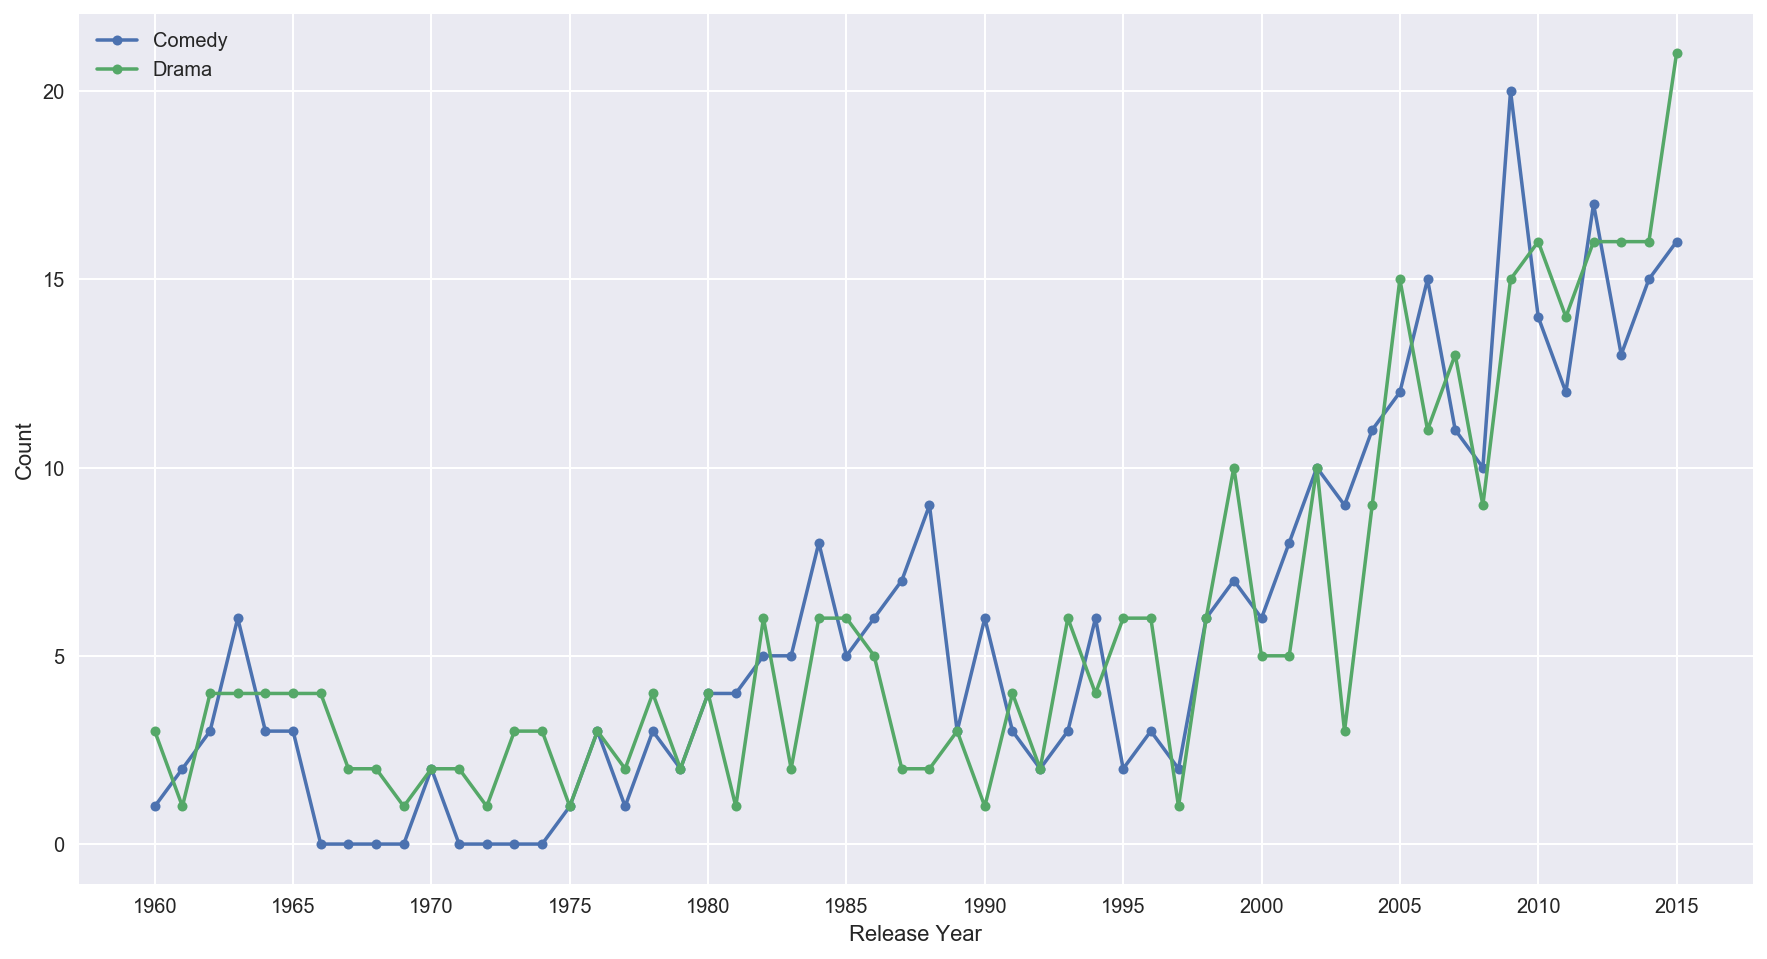

In [54]:
movie_genre_month_plot(df, ['Comedy','Drama'])

**得出结论：**

1）comedy，drama类型的电影数量 在1968年~2015年六月期间，均处于波动中增长的态势。

2）1960年六月份comedy，drama类型的电影数量分别为1部，3部；但2015年二者的数量分别增长到16部，21部。

3）2000年以前，comedy，drama类型的电影数量始终处于波动中，增长趋势十分微弱；大致在2000年之后，二者的数量开始出现明显的增长。